In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('placement.csv')
df.sample(4)

,cgpa,placement_exam_marks,placed
457,6.58,20.0,0
708,7.91,50.0,0
449,6.21,37.0,0
286,6.29,58.0,1


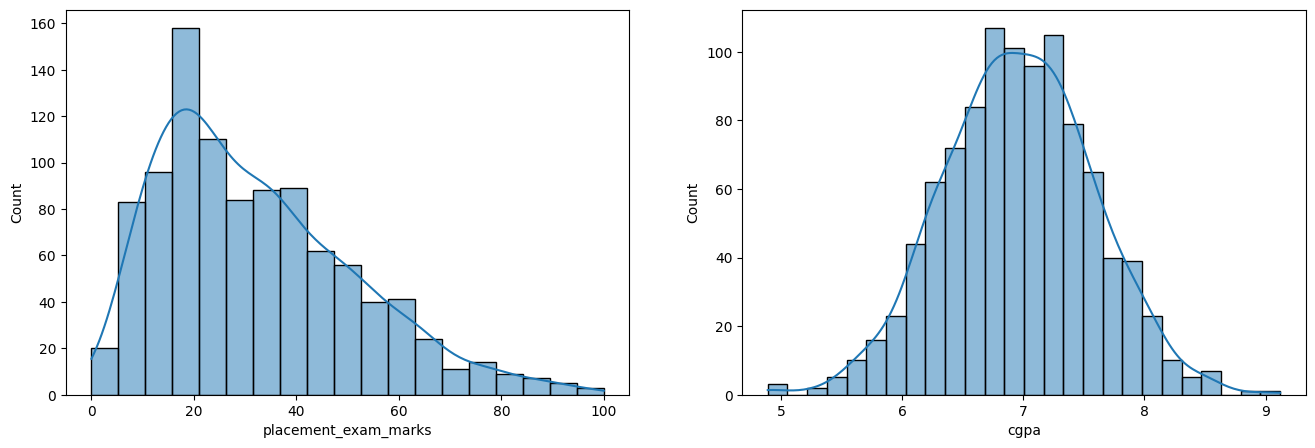

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['cgpa'],kde=True)
plt.show()

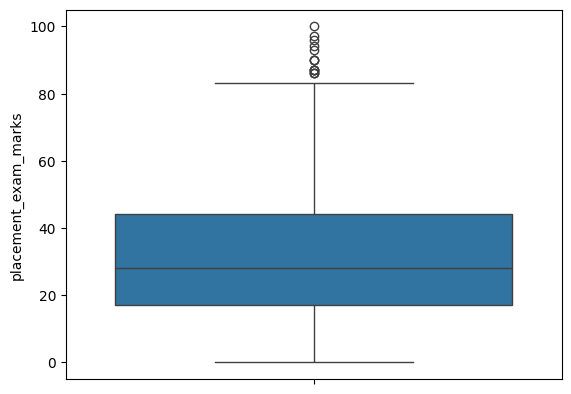

In [12]:

sns.boxplot(df['placement_exam_marks'])
plt.show()

In [5]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [6]:
df['cgpa'].skew()

-0.014529938929314918

In [10]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [13]:
percentile25=df['placement_exam_marks'].quantile(.25)
percentile75=df['placement_exam_marks'].quantile(.75)

In [14]:
percentile75

44.0

In [15]:
percentile25

17.0

In [16]:
iqr=percentile75-percentile25

In [17]:
iqr

27.0

In [18]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [19]:
print('upper_limit :',upper_limit)
print('lower_limit :',lower_limit)

upper_limit : 84.5
lower_limit : -23.5


In [27]:
df[(df['placement_exam_marks']>upper_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


Triming

In [21]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [22]:
df.shape

(1000, 3)

In [23]:
new_df.shape

(985, 3)

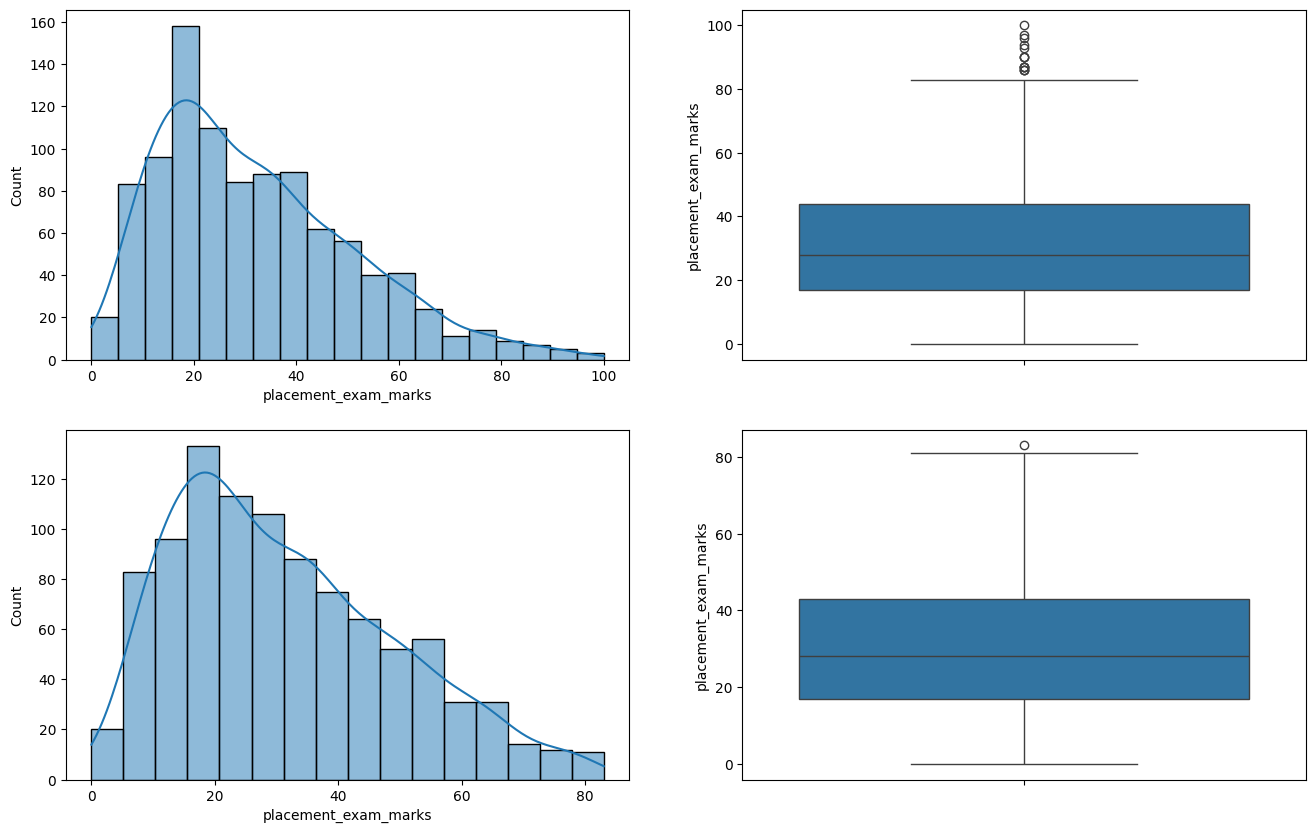

In [29]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)


plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde=True)


plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()


Capping

In [30]:
new_df_cap=df.copy()

new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [31]:
new_df_cap.shape

(1000, 3)

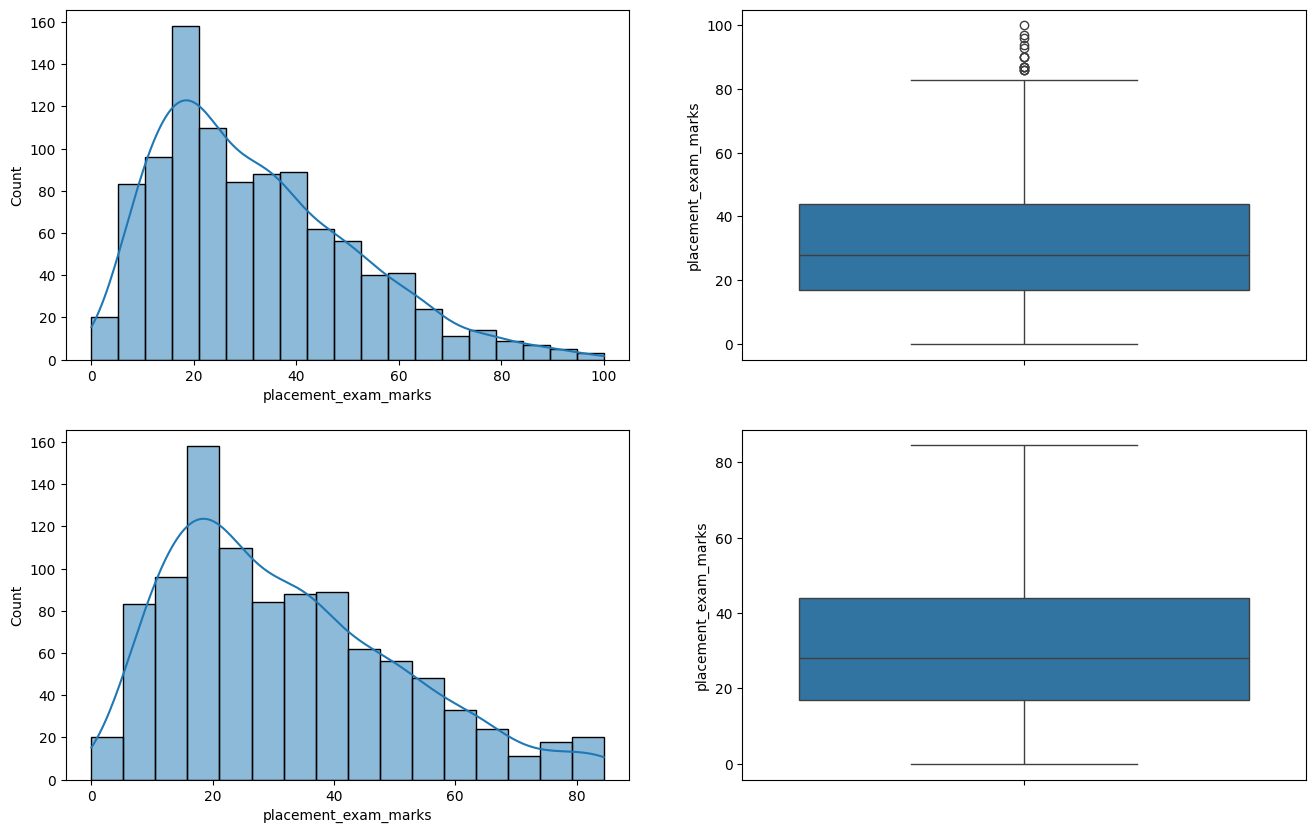

In [32]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)


plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True)


plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()
